In [158]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [159]:
#loading dataset
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [161]:
#droping columns which are redundant for the analysis
df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [162]:
# Define a function to clean and convert the values
def convert_value(val):
    if isinstance(val, str):
        if val.endswith('M'):
            return float(val.replace('€', '').replace('M', '')) * 1000000
        elif val.endswith('K'):
            return float(val.replace('€', '').replace('K', '')) * 1000
        else:
            return float(val.replace('€', ''))
    else:
        return val

# Apply the function to each column
df['Value'] = df['Value'].apply(convert_value)
df['Wage'] = df['Wage'].apply(convert_value)
df['Release Clause'] = df['Release Clause'].apply(convert_value)

# Print the DataFrame after conversion
print(df)

           ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club        Value      Wage Preferred Foot  ...  \
0             FC Barcelona  110500000.

In [163]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [164]:
#Converting the column "Joined" into integer data type with keeping only the year
pd.to_datetime(df['Joined']).dt.year

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

In [165]:
print(df)

           ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club        Value      Wage Preferred Foot  ...  \
0             FC Barcelona  110500000.

In [166]:
#Convert the column "Contract Valid Until" to pandas datetime type
pd.to_datetime(df['Contract Valid Until'], format='mixed')


0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [167]:
df['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [168]:
#The column 'Height' is in inches with a quotation mark, Convert to float
df['Height'].str.replace("'", '').str.replace('"', '').astype(float)



0         57.0
1         62.0
2         59.0
3         64.0
4        511.0
         ...  
18202     59.0
18203     63.0
18204     58.0
18205    510.0
18206    510.0
Name: Height, Length: 18207, dtype: float64

In [169]:
df['Height'].head(10)

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
5     5'8
6     5'8
7     6'0
8     6'0
9     6'2
Name: Height, dtype: object

In [170]:
#The column "Weight" has the suffix as lbs, remove the suffix and conver to float.
df['Weight']=df['Weight'].str.removesuffix('lbs').astype(float)

In [171]:
df['Weight'].head(10)

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
5    163.0
6    146.0
7    190.0
8    181.0
9    192.0
Name: Weight, dtype: float64

In [172]:
#Check for the percentage of missing values and impute them with appropriate imputation techniques. (4 points)
df.isnull().sum()/len(df)*100



ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [173]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [174]:
missing_values = df.isnull().sum()

# Step 2: Calculate the percentage of missing values for each column
total_values = df.shape[0]  # Total number of rows in the dataset
missing_percentage = df.isnull().sum()/len(df)*100

# Get the list of categorical columns
numerical_columns = df.select_dtypes(include='number').columns

# Fill missing values in numerical columns with their means
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)
    
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Fill missing values in categorical columns with their modes
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


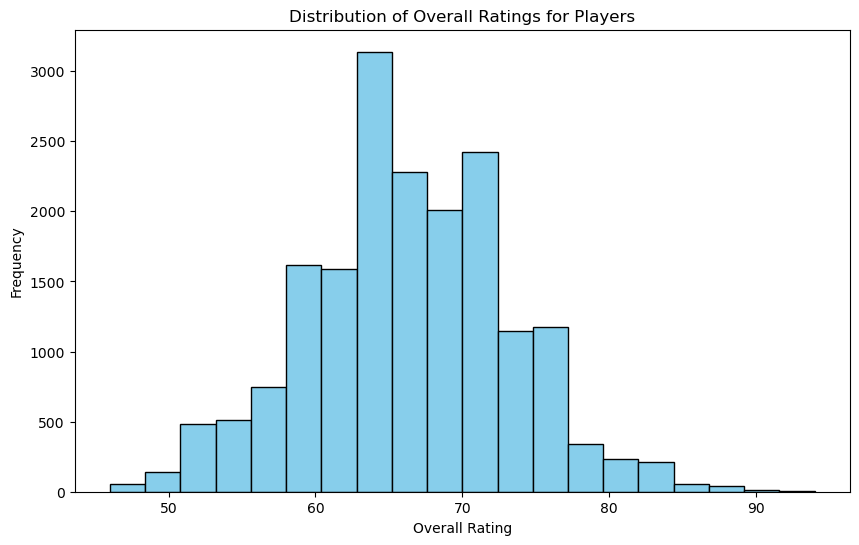

In [175]:
#EDA, Plot the distribution of Overall rating for all the players and write your findings
plt.figure(figsize=(10, 6))
plt.hist(df['Overall'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Overall Ratings for Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

plt.show()
#There are around 3000 players having 65 ratings and there are ver few players with more than 90 ratings

In [176]:
#Retrieve the names of top20 players based on the Overall rating
top_20_Players=df.sort_values(by='Overall', ascending=False).head(20)
top_20_Players['Name']


0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
12             D. Godín
13          David Silva
9              J. Oblak
11             T. Kroos
10       R. Lewandowski
20      Sergio Busquets
24         G. Chiellini
23            S. Agüero
22             M. Neuer
21            E. Cavani
16              H. Kane
Name: Name, dtype: object

In [177]:
#Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.
top_20_Players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


In [178]:
#What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)
top_20_Players['Age'].mean()


29.55

In [179]:
top_20_Players['Wage'].mean()

294950.0

In [180]:
#Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage. (2 points)

top_20_players_sorted_by_wage = top_20_Players.sort_values(by='Wage', ascending=False)
highest_wage_player = top_20_players_sorted_by_wage.iloc[0] 
highest_wage_player_name = highest_wage_player['Name']
highest_wage = highest_wage_player['Wage']

print("Player with the highest wage among the top 20 players:")
print("Name:", highest_wage_player_name)
print("Wage:", highest_wage)


Player with the highest wage among the top 20 players:
Name: L. Messi
Wage: 565000.0


                     Name                 Club      Wage  Overall
0                L. Messi         FC Barcelona  565000.0       94
1       Cristiano Ronaldo             Juventus  405000.0       94
2               Neymar Jr  Paris Saint-Germain  290000.0       92
3                  De Gea    Manchester United  260000.0       91
4            K. De Bruyne      Manchester City  355000.0       91
...                   ...                  ...       ...      ...
18202        J. Lundstram      Crewe Alexandra    1000.0       47
18203  N. Christoffersson       Trelleborgs FF    1000.0       47
18204           B. Worman     Cambridge United    1000.0       47
18205      D. Walker-Rice      Tranmere Rovers    1000.0       47
18206           G. Nugent      Tranmere Rovers    1000.0       46

[18207 rows x 4 columns]


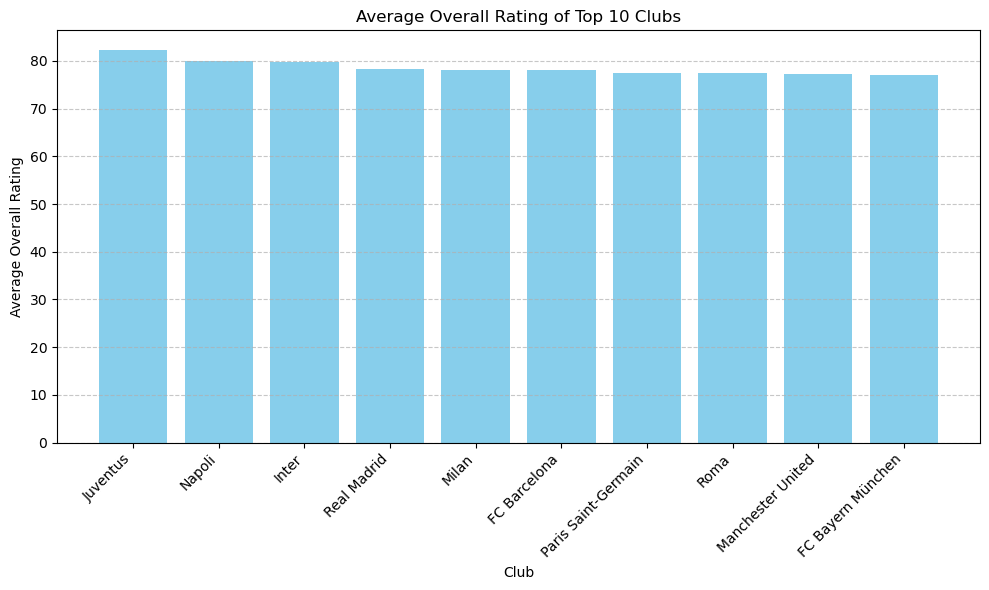

In [181]:
###Generate a dataframe which should include the "Player name", "Club
##Name", "Wage", and 'Overall rating'. (4 Points)
##- i) find the average Overall rating for each club.
##- ii) Display the average overall rating of Top10 Clubs using a plot

required_columns = ['Name', 'Club', 'Wage', 'Overall']
player_club_wage_overall_df = df[required_columns]
print(player_club_wage_overall_df)
# Calculate the average overall rating for each club
average_overall_by_club = player_club_wage_overall_df.groupby('Club')['Overall'].mean().reset_index()

# Display the average overall rating of the top 10 clubs using a plot
top_10_clubs = average_overall_by_club.nlargest(10, 'Overall')

# Plotting the average overall rating of top 10 clubs
plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs['Club'], top_10_clubs['Overall'], color='skyblue')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [182]:
#What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. (2 points)

df[['Age','Potential']].corr()

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


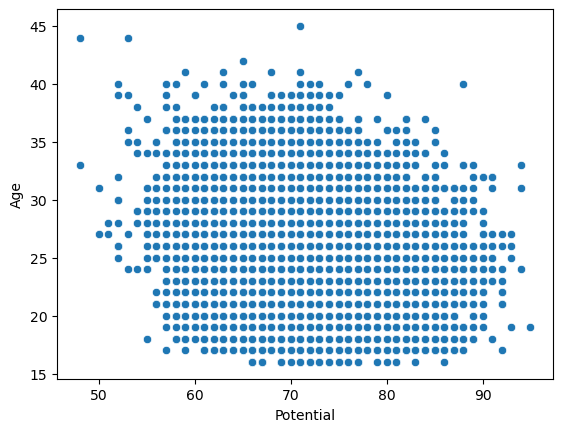

In [183]:
sns.scatterplot(x='Potential',y='Age',data=df)
plt.show()

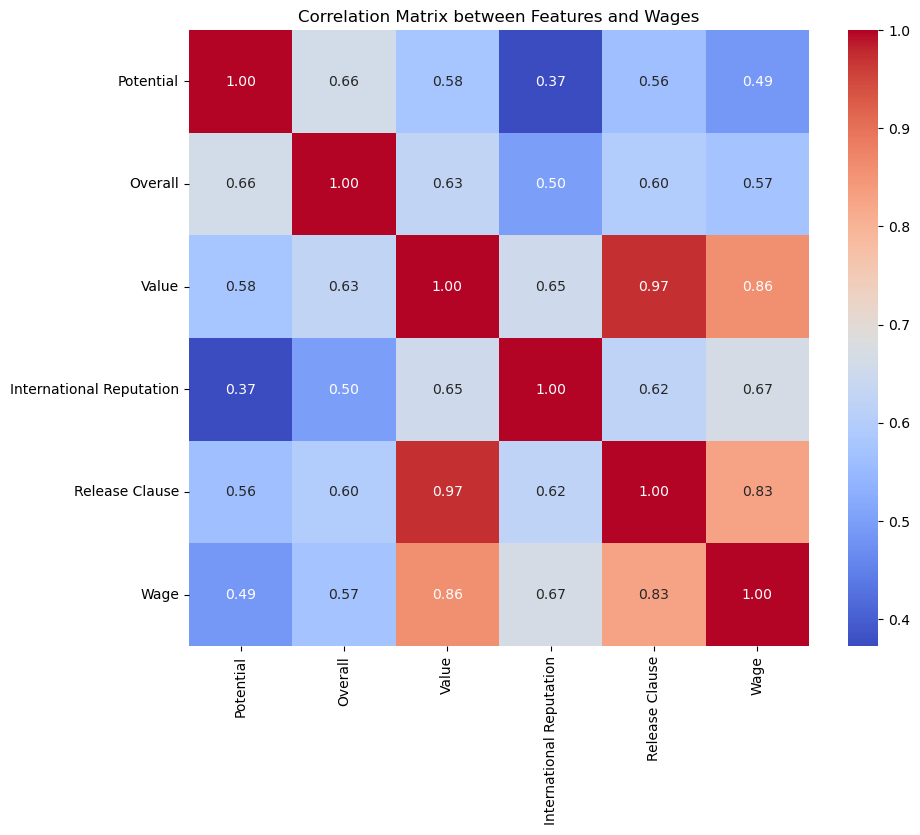

In [184]:
#Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause)

# Select the features and wages from the DataFrame
selected_data = df[['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause', 'Wage']]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Features and Wages')
plt.show()


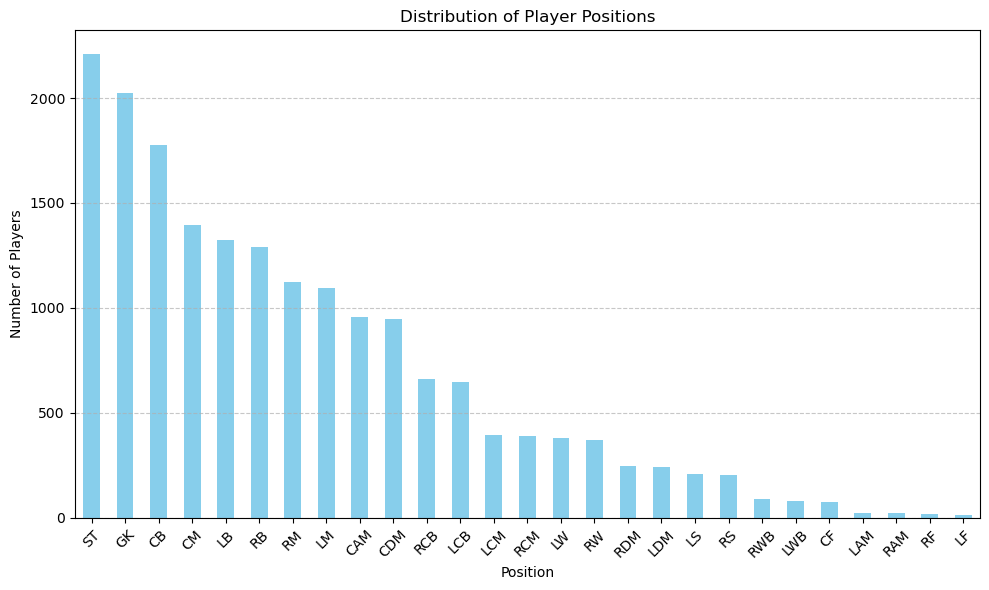

Position with maximum number of players: ST (2212 players)
Position with minimum number of players: LF (15 players)


In [185]:
#Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot
#Count the occurrences of each position
position_counts = df['Position'].value_counts()

# Find the position with the maximum number of players
max_position = position_counts.idxmax()
max_count = position_counts.max()

# Find the position with the minimum number of players
min_position = position_counts.idxmin()
min_count = position_counts.min()

# Plotting the distribution of player positions
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(f"Position with maximum number of players: {max_position} ({max_count} players)")
print(f"Position with minimum number of players: {min_position} ({min_count} players)")

In [186]:
#How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. (2 points)


# Convert the 'Wage' column to string data type
df['Wage'] = df['Wage'].astype(str)

# Remove the currency symbol '€' and 'K' representing thousands from the 'Wage' column
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', '')

# Convert the 'Wage' column to numeric format
df['Wage'] = pd.to_numeric(df['Wage'])

juventus_players_high_wage = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

print(juventus_players_high_wage)


        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking GKPositioning  \
1             31.0          23.0      7.0       11.0       15.0          14.0   
15            20.0          20.0      5.0        4.0        4.0           5.0   
24            93.0          90.0      3.0        3.0        2.0           4.0   

   GKReflexes Release Clause  
1        11.0    127100000.0  
15        8.0    15

In [187]:
#Generate a data frame containing top 5 players by Overall rating for each unique position. (2 Points)
grouped_by_position = df.groupby('Position')

top_5_players_by_position = []

for position, group in grouped_by_position:
    top_5_players = group.nlargest(5, 'Overall')
    top_5_players_by_position.append(top_5_players)

top_5_players_df = pd.concat(top_5_players_by_position)

top_5_players_df.reset_index(drop=True, inplace=True)

top_5_players_df



,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
1,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
2,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
3,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
4,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
131,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
132,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
133,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0


In [188]:
#What is the average wage one can expect to pay for the top 5 players in every position?(use the data frame created in Q19) (2 points)

# Filter players from the club 'Juventus' with a wage greater than 200K
juventus_high_wage_players = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

# Count the number of such players
num_juventus_high_wage_players = len(juventus_high_wage_players)

print("Number of players from the club 'Juventus' with a wage greater than 200K:", num_juventus_high_wage_players)


Number of players from the club 'Juventus' with a wage greater than 200K: 3


In [189]:
# Group the DataFrame by the 'Position' column
grouped_by_position = df.groupby('Position')

# Calculate the average wage for the top 5 players in each position
average_wage_top_5_players_by_position = grouped_by_position.apply(lambda x: x.nlargest(5, 'Overall')['Wage'].mean())

print("Average wage for the top 5 players in every position:")
print(average_wage_top_5_players_by_position)


Average wage for the top 5 players in every position:
Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
dtype: float64
